In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

In [17]:
import pickle
with open('nematic_order.pickle', 'rb') as fh:
    s2 = pickle.load(fh)

In [87]:
chain_lengths = np.array([6, 9, 12, 15, 18, 21])

In [88]:
for system, data in s2.items():
    if s2[system]['bot'] is None:
        s2[system]['total'] = float('nan')
        s2[system]['err'] = float('nan')
        continue
    s2[system]['total'] = (data['bot'] + data['top']) / 2
    s2[system]['err'] = 1/(1/data['bot_std'] + 1/data['top_std'])

In [89]:
rand_n100 =     np.asarray([x['total'] for n, x in s2.items() if 'n-100' in n and 'rand' in n])
rand_n100_std = np.asarray([x['err']   for n, x in s2.items() if 'n-100' in n and 'rand' in n])
rand_n81 =      np.asarray([x['total'] for n, x in s2.items() if 'n-81'  in n and 'rand' in n])
rand_n81_std =  np.asarray([x['err']   for n, x in s2.items() if 'n-81'  in n and 'rand' in n])
rand_n64 =      np.asarray([x['total'] for n, x in s2.items() if 'n-64'  in n and 'rand' in n])
rand_n64_std =  np.asarray([x['err']   for n, x in s2.items() if 'n-64'  in n and 'rand' in n])

grid_n81 =      np.asarray([x['total'] for n, x in s2.items() if 'n-81'  in n and 'grid' in n])
grid_n81_std =  np.asarray([x['err']   for n, x in s2.items() if 'n-81'  in n and 'grid' in n])
grid_n64 =      np.asarray([x['total'] for n, x in s2.items() if 'n-64'  in n and 'grid' in n])
grid_n64_std =  np.asarray([x['err']   for n, x in s2.items() if 'n-64'  in n and 'grid' in n])

rand_n100_mask = np.isfinite(rand_n100)
rand_n81_mask = np.isfinite(rand_n81)
rand_n64_mask = np.isfinite(rand_n64)
grid_n81_mask = np.isfinite(grid_n81)
grid_n64_mask = np.isfinite(grid_n64)

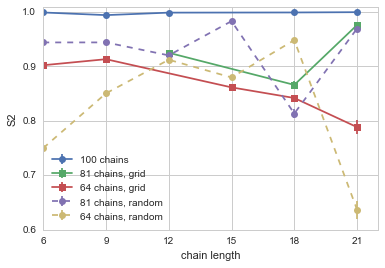

In [90]:
fig = plt.figure()

plt.errorbar(chain_lengths[rand_n100_mask], rand_n100[rand_n100_mask], yerr=rand_n100_std[rand_n100_mask],
             ls='-', marker='o', label='100 chains')
plt.errorbar(chain_lengths[grid_n81_mask], grid_n81[grid_n81_mask],  yerr=grid_n81_std[grid_n81_mask],  
             ls='-', marker='s', label='81 chains, grid')
plt.errorbar(chain_lengths[grid_n64_mask], grid_n64[grid_n64_mask],  yerr=grid_n64_std[grid_n64_mask],  
             ls='-', marker='s', label='64 chains, grid')

plt.errorbar(chain_lengths[rand_n81_mask], rand_n81[rand_n81_mask],  yerr=rand_n81_std[rand_n81_mask],  
             ls='--', marker='o', label='81 chains, random')
plt.errorbar(chain_lengths[rand_n81_mask], rand_n64[rand_n81_mask],  yerr=rand_n64_std[rand_n81_mask],  
             ls='--', marker='o', label='64 chains, random')

plt.xlabel('chain length')
plt.xticks(chain_lengths)

plt.ylabel('S2')
plt.ylim((0.6, 1.01))
plt.legend(loc='lower left')

In [91]:
fig.savefig('nematic.pdf', bbox_inches='tight')